In [6]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.table import join
import all_fctns

Source_dir ="C:\\Users\\mspan\\OneDrive - The University of Sydney (Students)\\Honours\\Honours Project\\"
catalogue_filepath = Source_dir + "Catalogues\\"
SAMI_regions = ("Cluster", "Filler", "GAMA")
SAMI_spectra_catalogue = "EmissionLine1compDR3.fits"
SAMI_SFR_catalogue = "AR2022_SAMI_DR3_Mstar_SFR_GSWL_rescaled.fits"
SAMI_AGN_summary_catalogue = "Crossmatched\\SAMI_AGN_matches.fits"

def refresh_module():
    import importlib
    import all_fctns
    importlib.reload(all_fctns)

with fits.open(catalogue_filepath + SAMI_SFR_catalogue) as hdul:
    SAMI_SFR_table = Table(hdul[1].data)
    

## SFR Table:

In [7]:
with fits.open(Source_dir +"Catalogues\\" + SAMI_SFR_catalogue) as SAMI_SFR_hdul:
    SAMI_SFR_table_hdu = Table(SAMI_SFR_hdul[1].data)

SAMI_SFR_table_hdu[SAMI_SFR_table_hdu['catid'] == 56140]


catid,Mstar_GSWL,Mstar_SAMI,Mstar_best,flag_Mstar,SFR_GSWL,SFR_PRO_GSWL,SFR_NUV_W3_GSWL,SFR_best,SFR_best_flag
int64,float64,float32,float64,float64,float64,float64,float64,float64,float64
56140,11.395421448690097,11.3,11.395421448690097,0.0,0.2804215881649658,0.2625195110762032,0.30366425899119365,0.2804215881649658,0.0


## Producing hopkins SFR plot

(<Column name='SFR_survey' dtype='float64' unit='' length=197>
  6.258690913467711
 53.279284284066286
  43.91458850462968
 48.393007797567584
  4.176739630215559
  33.22955378275994
  3.565315507085854
  3.563642528466585
  17.96318809176828
 135.62166340679278
 12.879310244434336
 17.270994806109275
                ...
 15.510358581270054
   79.4920132589375
 15.474183038862991
 21.489418059081242
 34.147252670155446
 42.002722785810825
  5.254483651049854
  5.724946670677617
 14.706320359531023
  5.931459366354386
  143.4479855072865,
 <Column name='SFR_SAMI_temporary' dtype='float64' length=197>
   4.736908442847633
  2.8029359724985743
   61.65621749668302
   9.912182630516376
  0.7909737032757722
  0.6434795702895936
 0.15449643252699716
  1.5889673102705286
      4.246710740793
 0.14277577810522316
  0.1701424701438903
  0.3181115309620969
                 ...
 0.19148128945033766
  0.2424111097910947
  2.7779886158282063
   7.938656918745394
                 nan
 0.080609482150

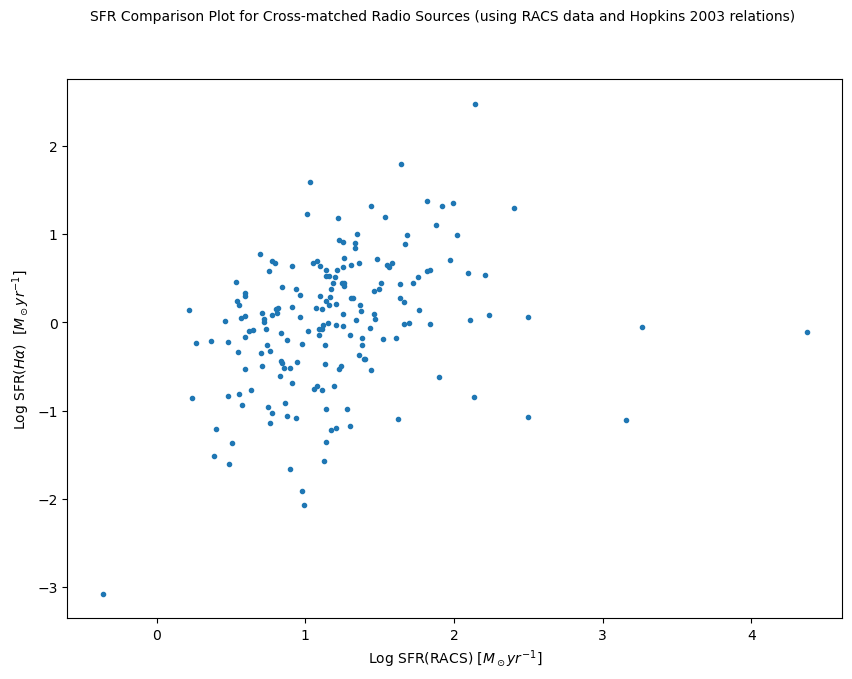

In [8]:
refresh_module()


# will use the produced summary table for this part

with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

is_radiomatch = SAMI_AGN_summary_table['IS_RADIOSOURCE']
radiomatched_CATIDs = SAMI_AGN_summary_table['CATID'][is_radiomatch==1]


# plot for AGN (4,5,6), Inconclusive or Composite/AGN (3,7), Composite (2) BPT locations
        

height, width = 7, 10
fig1, axs = plt.subplots(1, 1)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'SFR Comparison Plot for Cross-matched Radio Sources (using RACS data and Hopkins 2003 relations)', fontsize=10)

ax=axs

x_axis_label = 'Log SFR(RACS) $[M_\\odot yr^{-1}]$'
ax.set(xlabel=x_axis_label,ylabel='Log SFR($H\\alpha$)  $[M_\\odot yr^{-1}]$')

all_fctns.SFR_comparison_plot(ax, catalogue_filepath, SAMI_AGN_summary_table, SAMI_spectra_table_hdu, radiomatched_CATIDs, marker = '.', SAMI_SFR_table_type='Halpha')



### Ha SFR

Number of Radio objects w/o SAMI SFR: 21


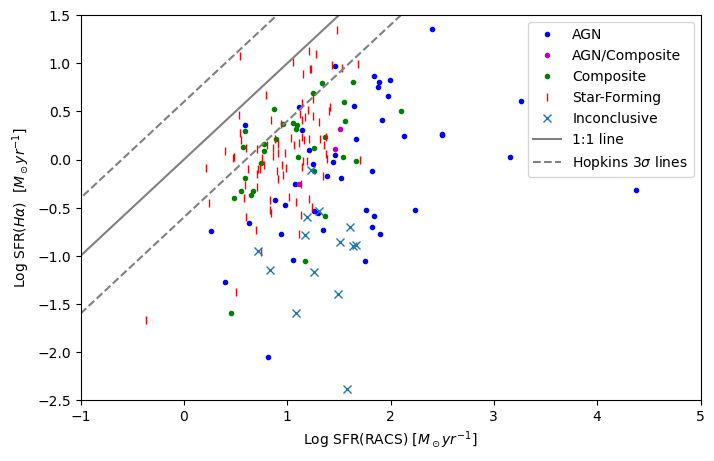

In [21]:
refresh_module()


# will use the produced summary table for this part
with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

is_radiomatch = SAMI_AGN_summary_table['IS_RADIOSOURCE'] ==1




height, width = 5, 8
fig1, axs = plt.subplots(1, 1)
fig1.set_figheight(height)
fig1.set_figwidth(width)
#fig1.suptitle(f'SFR Comparison Plot for Cross-matched Radio Sources (using RACS data and Hopkins 2003 relations)', fontsize=10)

plot_ylims = -2.5, 1.5
plot_xlims = -1, 5

ax=axs


# plot for AGN (4,5,6), Inconclusive or Composite/AGN (3,7), Composite (2) BPT locations
        
SFR_AGN_classifications = {'AGN': [(6,7,8,9,10), 'b.'], 'AGN/Composite': [(3,4), 'm.'], 'Composite': [(2,), 'g.'], 'Star-Forming': [(0,1), 'r|'], 'Inconclusive': [(-1,), 'x']}

No_SAMI_SFR = 0
for AGN_classification in SFR_AGN_classifications:
    relevant_BPT_AGN_categories = SFR_AGN_classifications[AGN_classification][0]
    plot_marker = SFR_AGN_classifications[AGN_classification][1]

    CATIDs_mask = is_radiomatch & np.isin(SAMI_AGN_summary_table['CATEGORY_BPT_AGN'], relevant_BPT_AGN_categories)

    # include those with to high BPT_SN in the inconclusive points
    if AGN_classification == 'Inconclusive':
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 1
        CATIDs_mask = CATIDs_mask | SN_mask

    else: # don't include these galaxies
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 0
        CATIDs_mask = CATIDs_mask & SN_mask

    relevant_CATIDs = SAMI_AGN_summary_table['CATID'][CATIDs_mask]

    SFR_Radio, SFR_SAMI = all_fctns.SFR_comparison_plot(ax, catalogue_filepath, SAMI_AGN_summary_table, SAMI_spectra_table_hdu, relevant_CATIDs, marker = plot_marker, label=AGN_classification, SAMI_SFR_table_type='Halpha')

    No_SAMI_SFR += np.sum(np.isnan(SFR_SAMI))



print(f"Number of Radio objects w/o SAMI SFR: {No_SAMI_SFR}")



x_axis_label = 'Log SFR(RACS) $[M_\\odot yr^{-1}]$'
ax.set(xlim = plot_xlims, ylim = plot_ylims, xlabel=x_axis_label,ylabel='Log SFR($H\\alpha$)  $[M_\\odot yr^{-1}]$')



# add a 1:1 line to the plot
array_1to1 = np.array( [max(plot_ylims[0], plot_xlims[0]), min(plot_xlims[1], plot_ylims[1])])
ax.plot(array_1to1,array_1to1, 'grey', label='1:1 line')
ax.plot((array_1to1[0]-0.6, array_1to1[1]), (array_1to1[0], array_1to1[1]+0.6), 'grey', linestyle = '--', label='Hopkins $3\\sigma$ lines')
ax.plot((array_1to1[0], array_1to1[1]+0.6), (array_1to1[0]-0.6, array_1to1[1]), 'grey', linestyle = '--')

plt.legend()

plt.show()


1
AGN num_sources: 45
0
AGN/Composite num_sources: 3
1
Composite num_sources: 32
4
Star-Forming num_sources: 93
15
Inconclusive num_sources: 77
Number of Radio objects w/o SAMI SFR: 21


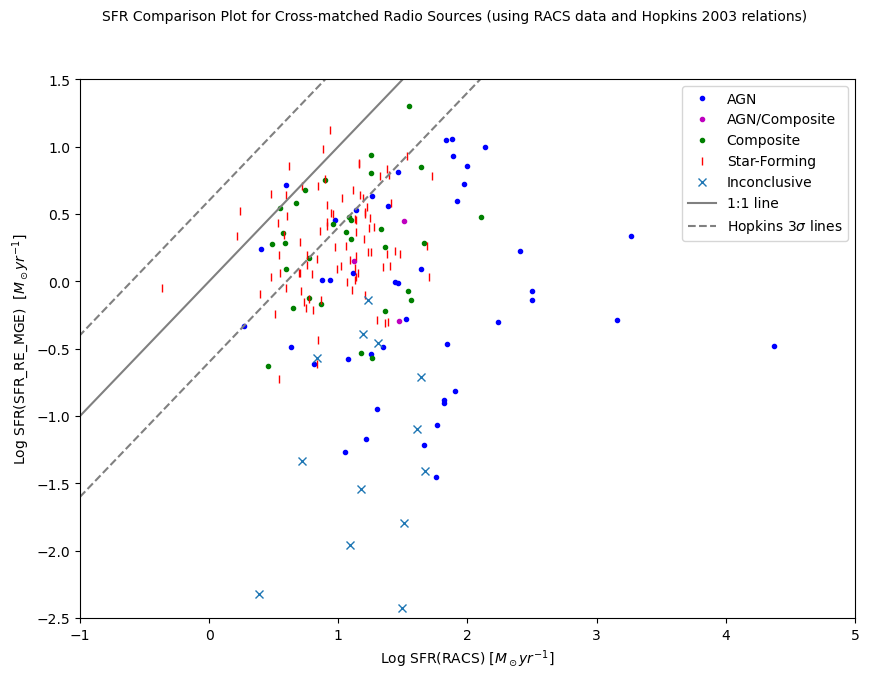

In [10]:
refresh_module()


# will use the produced summary table for this part
with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

is_radiomatch = SAMI_AGN_summary_table['IS_RADIOSOURCE'] ==1
 



height, width = 7, 10
fig1, axs = plt.subplots(1, 1)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'SFR Comparison Plot for Cross-matched Radio Sources (using RACS data and Hopkins 2003 relations)', fontsize=10)

plot_ylims = -2.5, 1.5
plot_xlims = -1, 5

ax=axs


# plot for AGN (4,5,6), Inconclusive or Composite/AGN (3,7), Composite (2) BPT locations
        
SFR_AGN_classifications = {'AGN': [(6,7,8,9,10), 'b.'], 'AGN/Composite': [(3,4), 'm.'], 'Composite': [(2,), 'g.'], 'Star-Forming': [(0,1), 'r|'], 'Inconclusive': [(-1,), 'x']}

No_SAMI_SFR = 0
for AGN_classification in SFR_AGN_classifications:
    relevant_BPT_AGN_categories = SFR_AGN_classifications[AGN_classification][0]
    plot_marker = SFR_AGN_classifications[AGN_classification][1]

    CATIDs_mask = is_radiomatch & np.isin(SAMI_AGN_summary_table['CATEGORY_BPT_AGN'], relevant_BPT_AGN_categories)

    # include those with to high BPT_SN in the inconclusive points
    if AGN_classification == 'Inconclusive':
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 1
        CATIDs_mask = CATIDs_mask | SN_mask

    else: # don't include these galaxies
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 0
        CATIDs_mask = CATIDs_mask & SN_mask

    relevant_CATIDs = SAMI_AGN_summary_table['CATID'][CATIDs_mask]

    SFR_Radio, SFR_SAMI = all_fctns.SFR_comparison_plot(ax, catalogue_filepath, SAMI_AGN_summary_table, SAMI_spectra_table_hdu, relevant_CATIDs, marker = plot_marker, label=AGN_classification, SAMI_SFR_table_type='SFR_spectra')

    No_SAMI_SFR += np.sum(np.isnan(SFR_SAMI))

    print(np.sum(CATIDs_mask) - np.sum(~np.isnan(SFR_SAMI)))
    print(f"{AGN_classification} num_sources: {np.sum(CATIDs_mask)}")


print(f"Number of Radio objects w/o SAMI SFR: {No_SAMI_SFR}")



x_axis_label = 'Log SFR(RACS) $[M_\\odot yr^{-1}]$'
ax.set(xlim = plot_xlims, ylim = plot_ylims, xlabel=x_axis_label,ylabel='Log SFR(SFR_RE_MGE)  $[M_\\odot yr^{-1}]$')



# add a 1:1 line to the plot
array_1to1 = np.array( [max(plot_ylims[0], plot_xlims[0]), min(plot_xlims[1], plot_ylims[1])])
ax.plot(array_1to1,array_1to1, 'grey', label='1:1 line')
ax.plot((array_1to1[0]-0.6, array_1to1[1]), (array_1to1[0], array_1to1[1]+0.6), 'grey', linestyle = '--', label='Hopkins $3\\sigma$ lines')
ax.plot((array_1to1[0], array_1to1[1]+0.6), (array_1to1[0]-0.6, array_1to1[1]), 'grey', linestyle = '--')

plt.legend()

plt.show()


### SAMI SFR


8
AGN num_sources: 45
0
AGN/Composite num_sources: 3
3
Composite num_sources: 32
2
Star-Forming num_sources: 93
19
Inconclusive num_sources: 77
Number of Radio objects w/o SAMI SFR: 32


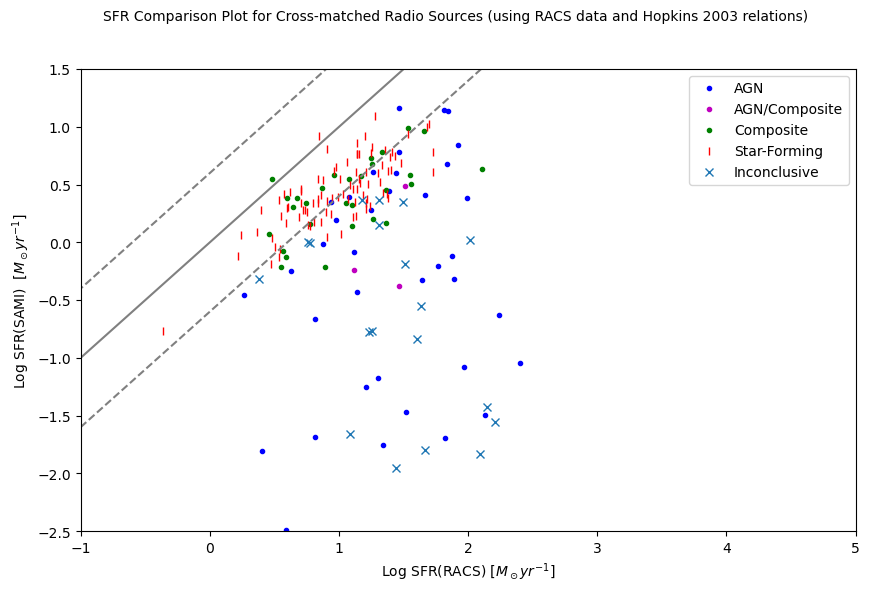

In [11]:
refresh_module()


# will use the produced summary table for this part

with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_SFR_catalogue) as SAMI_SFR_hdul:
    SAMI_SFR_table = Table(SAMI_SFR_hdul[1].data)

is_radiomatch = SAMI_AGN_summary_table['IS_RADIOSOURCE'] ==1




height, width = 6, 10
fig1, axs = plt.subplots(1, 1)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'SFR Comparison Plot for Cross-matched Radio Sources (using RACS data and Hopkins 2003 relations)', fontsize=10)

ax=axs

plot_ylims = -2.5, 1.5
plot_xlims = -1, 5

# plot for AGN (4,5,6), Inconclusive or Composite/AGN (3,7), Composite (2) BPT locations
        
SFR_AGN_classifications = {'AGN': [(6,7,8,9,10), 'b.'], 'AGN/Composite': [(3,4), 'm.'], 'Composite': [(2,), 'g.'], 'Star-Forming': [(0,1), 'r|'], 'Inconclusive': [(-1,), 'x']}

No_SAMI_SFR = 0
for AGN_classification in SFR_AGN_classifications:
    relevant_BPT_AGN_categories = SFR_AGN_classifications[AGN_classification][0]
    plot_marker = SFR_AGN_classifications[AGN_classification][1]

    CATIDs_mask = is_radiomatch & np.isin(SAMI_AGN_summary_table['CATEGORY_BPT_AGN'], relevant_BPT_AGN_categories)

    # include those with to high BPT_SN in the inconclusive points
    if AGN_classification == 'Inconclusive':
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 1
        CATIDs_mask = CATIDs_mask | SN_mask

    else: # don't include these galaxies
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 0
        CATIDs_mask = CATIDs_mask & SN_mask

    relevant_CATIDs = SAMI_AGN_summary_table['CATID'][CATIDs_mask]
    
    SFR_Radio, SFR_SAMI = all_fctns.SFR_comparison_plot(ax,catalogue_filepath, SAMI_AGN_summary_table, SAMI_SFR_table, relevant_CATIDs, marker = plot_marker, label=AGN_classification)

    No_SAMI_SFR += np.sum(np.isnan(SFR_SAMI))
    print(np.sum(CATIDs_mask) - np.sum(~np.isnan(SFR_SAMI)))
    print(f"{AGN_classification} num_sources: {np.sum(CATIDs_mask)}")


print(f"Number of Radio objects w/o SAMI SFR: {No_SAMI_SFR}")



x_axis_label = 'Log SFR(RACS) $[M_\\odot yr^{-1}]$'
ax.set(xlim = plot_xlims, ylim = plot_ylims, xlabel=x_axis_label,ylabel='Log SFR(SAMI)  $[M_\\odot yr^{-1}]$')
plt.legend()



# add a 1:1 line to the plot
array_1to1 = np.array( [max(plot_ylims[0], plot_xlims[0]), min(plot_xlims[1], plot_ylims[1])])
ax.plot(array_1to1,array_1to1, 'grey', label='1:1 line')
ax.plot((array_1to1[0]-0.6, array_1to1[1]), (array_1to1[0], array_1to1[1]+0.6), 'grey', linestyle = '--', label='Hopkins $3\\sigma$ lines')
ax.plot((array_1to1[0], array_1to1[1]+0.6), (array_1to1[0]-0.6, array_1to1[1]), 'grey', linestyle = '--')

plt.show()



In [12]:
SAMI_SFR_table

catid,Mstar_GSWL,Mstar_SAMI,Mstar_best,flag_Mstar,SFR_GSWL,SFR_PRO_GSWL,SFR_NUV_W3_GSWL,SFR_best,SFR_best_flag
int64,float64,float32,float64,float64,float64,float64,float64,float64,float64
6821,nan,7.42,7.472423553466797,1.0,nan,nan,-0.8337829957020938,-0.8337829957020938,2.0
6837,nan,9.0,9.083897590637207,1.0,nan,-0.10811913977560492,0.10894101108507018,-0.10811913977560492,1.0
7139,10.622782578388966,10.63,10.622782578388966,0.0,-1.4812175131637677,nan,nan,-1.4812175131637677,0.0
7206,10.673105894291568,10.48,10.673105894291568,0.0,0.5071057664992104,0.5084457590485947,0.5457081460815092,0.5071057664992104,0.0
7289,11.270362742363309,11.12,11.270362742363309,0.0,-0.42963751393666283,-0.19095265691973967,nan,-0.42963751393666283,0.0
7715,11.076317122732107,10.99,11.076317122732107,0.0,-0.9876825301304426,-inf,nan,-0.9876825301304426,0.0
7839,nan,11.05,11.174734115600586,1.0,nan,-0.9330332098451861,nan,-0.9330332098451861,1.0
7841,10.993681120446723,10.96,10.993681120446723,0.0,-1.3503192190613338,-20.068587600924474,nan,-1.3503192190613338,0.0
7946,11.16235649868375,10.92,11.16235649868375,0.0,0.07435618623620215,-285.4200168771223,0.019185071820671362,0.07435618623620215,0.0


In [13]:
SAMI_AGN_summary_table[SAMI_AGN_summary_table['CATID'] == 56140]


CUBEIDPUB,CUBEID,CATID,IS_BPT_AGN,CATEGORY_BPT_AGN,IS_OTHER_BPT_AGN,WARN_BPT_SN,WARN_AGN_OTHER_BPT,WARN_AGN_TYPE_OTHER_BPT,IS_RADIOSOURCE,RACS_MATCHED_ID,RACS_TOTALFLUX,RACS_TOTALFLUX_ERR,RACS_SOURCE_CLASSIFICATION,IS_XRAYSOURCE,eROSITA_MATCHED_ID,eROSITA_TOTALFLUX_1,eROSITA_TOTALFLUX_1_ERR,eROSITA_TOTALFLUX_2,eROSITA_TOTALFLUX_2_ERR,eROSITA_TOTALFLUX_3,eROSITA_TOTALFLUX_3_ERR,IS_LARGESSSOURCE,LARGESS_MATCHED_ID,LARGESS_imod,LARGESS_e_imod,N_FIRST,FIRST_TOTALFLUX,N_NVSS,NVSS_TOTALFLUX,IS_BROADLINE_AGN,M_STAR,Z_SPEC,SFR_SAMI,SFR_SAMI_FLAG
str16,str80,float64,int64,int64,int64,int64,int64,int64,int64,str17,float64,float64,str1,int64,str23,float32,float32,float32,float32,float32,float32,int64,str19,float64,float64,int64,float64,int64,float64,int64,float32,float64,float64,float64
56140_A,56140_14_Y14SAR3_P004_12T055_2014_04_24-2014_05_04,56140.0,1,6,1,0,0,1,1,RACS_1232+00_3361,1.2625694037327755,0.37881595581638683,S,0,,nan,nan,nan,nan,nan,nan,0,,nan,nan,999999,nan,999999,nan,0,11.3,0.08111000061035156,0.2804215881649658,0.0


In [14]:
SAMI_SFR_table[SAMI_SFR_table['catid'] == 56140]

catid,Mstar_GSWL,Mstar_SAMI,Mstar_best,flag_Mstar,SFR_GSWL,SFR_PRO_GSWL,SFR_NUV_W3_GSWL,SFR_best,SFR_best_flag
int64,float64,float32,float64,float64,float64,float64,float64,float64,float64
56140,11.395421448690097,11.3,11.395421448690097,0.0,0.2804215881649658,0.2625195110762032,0.30366425899119365,0.2804215881649658,0.0


### SFR classifying plot (Emission Catalogue SFR)

#### RACS radio flux

Number of Radio objects w/o SAMI SFR: 21


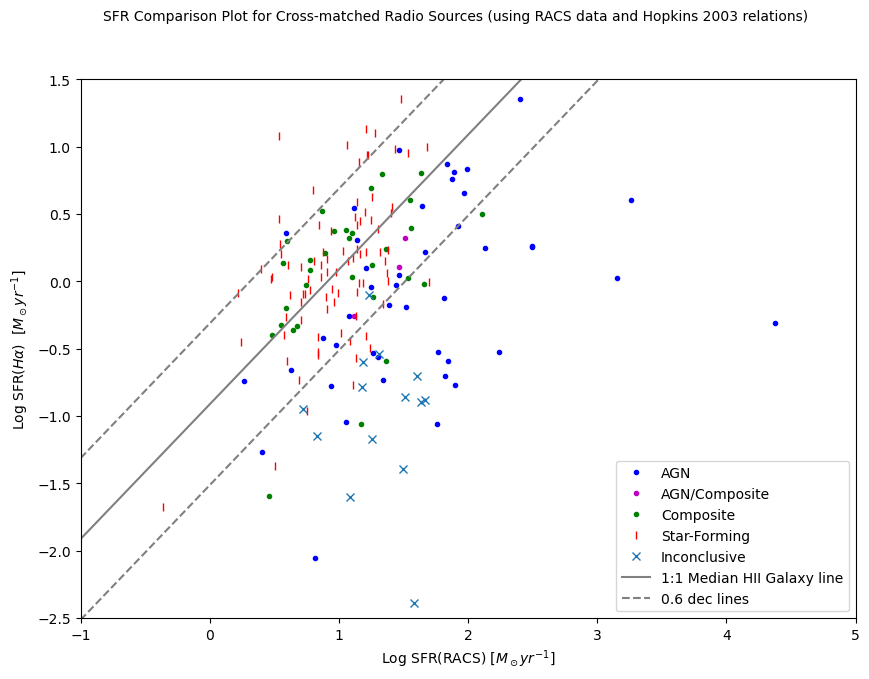

In [15]:
refresh_module()


# will use the produced summary table for this part
with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

is_radiomatch = SAMI_AGN_summary_table['IS_RADIOSOURCE'] ==1




height, width = 7, 10
fig1, axs = plt.subplots(1, 1)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'SFR Comparison Plot for Cross-matched Radio Sources (using RACS data and Hopkins 2003 relations)', fontsize=10)

plot_ylims = -2.5, 1.5
plot_xlims = -1, 5

ax=axs


# plot for AGN (4,5,6), Inconclusive or Composite/AGN (3,7), Composite (2) BPT locations
        
SFR_AGN_classifications = {'AGN': [(6,7,8,9,10), 'b.'], 'AGN/Composite': [(3,4,5), 'm.'], 'Composite': [(2,), 'g.'], 'Star-Forming': [(0,1), 'r|'], 'Inconclusive': [(-1,), 'x']}

No_SAMI_SFR = 0
for AGN_classification in SFR_AGN_classifications:
    relevant_BPT_AGN_categories = SFR_AGN_classifications[AGN_classification][0]
    plot_marker = SFR_AGN_classifications[AGN_classification][1]

    CATIDs_mask = is_radiomatch & np.isin(SAMI_AGN_summary_table['CATEGORY_BPT_AGN'], relevant_BPT_AGN_categories)

    # include those with to high BPT_SN in the inconclusive points
    if AGN_classification == 'Inconclusive':
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 1
        CATIDs_mask = CATIDs_mask | SN_mask

    else: # don't include these galaxies
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 0
        CATIDs_mask = CATIDs_mask & SN_mask

    relevant_CATIDs = SAMI_AGN_summary_table['CATID'][CATIDs_mask]

    SFR_Radio, SFR_SAMI = all_fctns.SFR_comparison_plot(ax, catalogue_filepath, SAMI_AGN_summary_table, SAMI_spectra_table_hdu, relevant_CATIDs, marker = plot_marker, label=AGN_classification, SAMI_SFR_table_type='Halpha')
  
    No_SAMI_SFR += np.sum(np.isnan(SFR_SAMI))

    # get the star-forming median point
    if AGN_classification == 'Star-Forming':
        SFR_radio_median = np.nanmedian(SFR_Radio)
        SFR_SAMI_median = np.nanmedian(SFR_SAMI, )



print(f"Number of Radio objects w/o SAMI SFR: {No_SAMI_SFR}")



x_axis_label = 'Log SFR(RACS) $[M_\\odot yr^{-1}]$'
ax.set(xlim = plot_xlims, ylim = plot_ylims, xlabel=x_axis_label,ylabel='Log SFR($H\\alpha$)  $[M_\\odot yr^{-1}]$')



# add a 1:1 line to the plot
median_1to1 = lambda logx: logx - np.log10(SFR_radio_median) + np.log10(SFR_SAMI_median)

logx_array = np.linspace(-1, 4, 100)

ax.plot(logx_array, median_1to1(logx_array), 'grey', label='1:1 Median HII Galaxy line')

ax.plot(logx_array, median_1to1(logx_array)-0.6, 'grey', linestyle = '--', label='0.6 dec lines')
ax.plot(logx_array, median_1to1(logx_array)+0.6, 'grey', linestyle = '--')

plt.legend()

plt.show()

#### FIRST radio flux

Number of Radio objects w/o SAMI SFR: 18


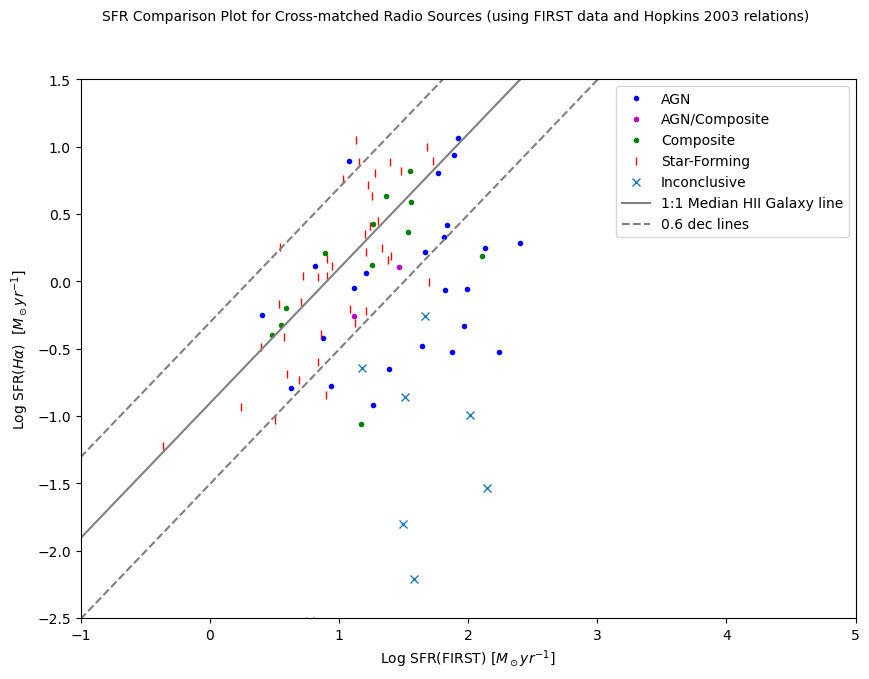

In [16]:
refresh_module()


# will use the produced summary table for this part
with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

is_radiomatch = SAMI_AGN_summary_table['IS_LARGESSSOURCE'] ==1




height, width = 7, 10
fig1, axs = plt.subplots(1, 1)
fig1.set_figheight(height)
fig1.set_figwidth(width)
fig1.suptitle(f'SFR Comparison Plot for Cross-matched Radio Sources (using FIRST data and Hopkins 2003 relations)', fontsize=10)

plot_ylims = -2.5, 1.5
plot_xlims = -1, 5

ax=axs


# plot for AGN (4,5,6), Inconclusive or Composite/AGN (3,7), Composite (2) BPT locations
        
SFR_AGN_classifications = {'AGN': [(6,7,8,9,10), 'b.'], 'AGN/Composite': [(3,4), 'm.'], 'Composite': [(2,), 'g.'], 'Star-Forming': [(0,1), 'r|'], 'Inconclusive': [(-1,), 'x']}

No_SAMI_SFR = 0
for AGN_classification in SFR_AGN_classifications:
    relevant_BPT_AGN_categories = SFR_AGN_classifications[AGN_classification][0]
    plot_marker = SFR_AGN_classifications[AGN_classification][1]

    CATIDs_mask = is_radiomatch & np.isin(SAMI_AGN_summary_table['CATEGORY_BPT_AGN'], relevant_BPT_AGN_categories)

    # include those with to high BPT_SN in the inconclusive points
    if AGN_classification == 'Inconclusive':
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 1
        CATIDs_mask = CATIDs_mask | SN_mask

    else: # don't include these galaxies
        SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 0
        CATIDs_mask = CATIDs_mask & SN_mask

    relevant_CATIDs = SAMI_AGN_summary_table['CATID'][CATIDs_mask]

    SFR_Radio, SFR_SAMI = all_fctns.SFR_comparison_plot(ax, catalogue_filepath, SAMI_AGN_summary_table, SAMI_spectra_table_hdu, relevant_CATIDs, marker = plot_marker, label=AGN_classification, SAMI_SFR_table_type='Halpha')
  
    No_SAMI_SFR += np.sum(np.isnan(SFR_SAMI))

    # get the star-forming median point
    if AGN_classification == 'Star-Forming':
        SFR_radio_median = np.nanmedian(SFR_Radio)
        SFR_SAMI_median = np.nanmedian(SFR_SAMI, )



print(f"Number of Radio objects w/o SAMI SFR: {No_SAMI_SFR}")



x_axis_label = 'Log SFR(FIRST) $[M_\\odot yr^{-1}]$'
ax.set(xlim = plot_xlims, ylim = plot_ylims, xlabel=x_axis_label,ylabel='Log SFR($H\\alpha$)  $[M_\\odot yr^{-1}]$')



# add a 1:1 line to the plot
median_1to1 = lambda logx: logx - np.log10(SFR_radio_median) + np.log10(SFR_SAMI_median)

logx_array = np.linspace(-1, 4, 100)

ax.plot(logx_array, median_1to1(logx_array), 'grey', label='1:1 Median HII Galaxy line')

ax.plot(logx_array, median_1to1(logx_array)-0.6, 'grey', linestyle = '--', label='0.6 dec lines')
ax.plot(logx_array, median_1to1(logx_array)+0.6, 'grey', linestyle = '--')

plt.legend()

plt.show()

In [17]:
def get_Radio_SFR_classification(SAMI_AGN_summary_table, SAMI_SFR_table_hdu, SAMI_SFR_table_type = 'SFR', survey_type='Radio', SN_lim=5, dec_seperation=0.6):
    """
    
    0: not a Radio Source
    1:  within 0.6 decs of 1to1 median line
    2:  outisde 0.6 decs of 1to1 median line
    3:  no SFR
    """
    # initialise array (set to -10 as this is not a valid galaxy type)
    radio_SFR_classifcations = np.full(len(SAMI_AGN_summary_table['CATID']), -10, dtype=int)
    


    # first set all those without a matched radio source to 0
    is_radiomatch = SAMI_AGN_summary_table['IS_RADIOSOURCE'] ==1

    #SET no radiomatches to 0
    radio_SFR_classifcations[~is_radiomatch] = 0




    SFR_AGN_classifications = {'AGN': (6,7,8,9,10), 'AGN/Composite': (3,4), 'Composite': (2,), 'Star-Forming': (0,1), 'Inconclusive': (-1,)}

    # get the starforming medians to classify all others:
    relevant_BPT_AGN_categories = SFR_AGN_classifications['Star-Forming']
    HII_CATIDs_mask = is_radiomatch & np.isin(SAMI_AGN_summary_table['CATEGORY_BPT_AGN'], relevant_BPT_AGN_categories)

        # filter out those w/ high SN
    SN_mask = SAMI_AGN_summary_table['WARN_BPT_SN'] == 0
    HII_CATIDs_mask = HII_CATIDs_mask & SN_mask
    HII_CATIDs = SAMI_AGN_summary_table['CATID'][HII_CATIDs_mask]


    # set the HII ones to be within the line


    HII_SFR_survey, HII_SFR_SAMI = all_fctns.get_SFRs(catalogue_filepath, SAMI_AGN_summary_table, SAMI_SFR_table_hdu, relevant_CATIDs=HII_CATIDs, SAMI_SFR_table_type=SAMI_SFR_table_type, survey_type=survey_type, SN_lim=SN_lim)
    
    HII_SFR_radio_median = np.nanmedian(HII_SFR_survey)
    HII_SFR_SAMI_median = np.nanmedian(HII_SFR_SAMI)
    cutoff_line_fctn = lambda logx: logx - np.log10(HII_SFR_radio_median) + np.log10(HII_SFR_SAMI_median) - dec_seperation

    CATIDS_to_classify = SAMI_AGN_summary_table['CATID'][( is_radiomatch & np.isin(SAMI_AGN_summary_table['CATEGORY_BPT_AGN'], (-1,0,1, 2,3,4,5,6,7,8,9,10)) ) | ~SN_mask]

    # get the SFRs that we need for the appropriate CATIDS
    SFR_x, SFR_y = all_fctns.get_SFRs(catalogue_filepath, SAMI_AGN_summary_table, SAMI_SFR_table_hdu, relevant_CATIDs=CATIDS_to_classify, SAMI_SFR_table_type=SAMI_SFR_table_type, survey_type=survey_type, SN_lim=SN_lim)
    
    is_no_SFR = np.isnan(SFR_x) | np.isnan(SFR_y) 
    is_negative_SFR = (SFR_x <0) | (SFR_y <0) & ~is_no_SFR
    is_above_cutoff_line = ( np.log10(SFR_y) >= cutoff_line_fctn(np.log10(SFR_x)) ) & ~is_no_SFR & ~is_negative_SFR
    is_below_cutoff_line = ( np.log10(SFR_y) < cutoff_line_fctn(np.log10(SFR_x)) ) & ~is_no_SFR & ~is_negative_SFR

    # need to turn masks so that they are for the entire array not only for the CATIDs to classify
    no_SFR_CATIDs_mask = np.isin(SAMI_AGN_summary_table['CATID'], CATIDS_to_classify[is_no_SFR])
    negative_SFR_CATIDs_mask = np.isin(SAMI_AGN_summary_table['CATID'], CATIDS_to_classify[is_negative_SFR])
    above_cutoff_line_CATIDs_mask = np.isin(SAMI_AGN_summary_table['CATID'], CATIDS_to_classify[is_above_cutoff_line])
    below_cutoff_line_CATIDs_mask = np.isin(SAMI_AGN_summary_table['CATID'], CATIDS_to_classify[is_below_cutoff_line])


    radio_SFR_classifcations[above_cutoff_line_CATIDs_mask] = 1
    radio_SFR_classifcations[below_cutoff_line_CATIDs_mask] = 2
    radio_SFR_classifcations[no_SFR_CATIDs_mask] = 3
    radio_SFR_classifcations[negative_SFR_CATIDs_mask] = 4



    return radio_SFR_classifcations

refresh_module()


# will use the produced summary table for this part
with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)



np.sum(get_Radio_SFR_classification(SAMI_AGN_summary_table, SAMI_SFR_table_hdu)==-10)

c:\Users\mspan\miniforge3\Lib\site-packages\numpy\lib\_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*inputs)


np.int64(0)

In [18]:
refresh_module()


# will use the produced summary table for this part
with fits.open(Source_dir+"Catalogues\\"+SAMI_AGN_summary_catalogue) as SAMI_AGN_summary_hdul:
    SAMI_AGN_summary_table = Table(SAMI_AGN_summary_hdul[1].data)

with fits.open(Source_dir +"Catalogues\\" + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)



np.sum(get_Radio_SFR_classification(SAMI_AGN_summary_table, SAMI_SFR_table_hdu)==-10)


c:\Users\mspan\miniforge3\Lib\site-packages\numpy\lib\_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*inputs)


np.int64(0)

In [19]:
CATID_mask = np.isin(SAMI_AGN_summary_table['CATID'], relevant_CATIDs)
reduced_SAMI_AGN_summary_table = SAMI_AGN_summary_table[CATID_mask]

#get the redshift for each CATID:
CATID_redshifts = all_fctns.get_z_best(catalogue_filepath, reduced_SAMI_AGN_summary_table['CATID']) 

Table([CATID_redshifts], names=('redshifts',))

"redshifts [CATID, Z_SPEC]"
"(float64, float64)"
"(16920.0, 0.039480000734329224)"
"(54270.0, 0.08474999666213989)"
"(54957.0, 0.07697000354528427)"
"(70808.0, 0.04190000146627426)"
"(91988.0, 0.05299999937415123)"
"(143446.0, 0.007530000060796738)"
"(177232.0, 0.07818999886512756)"
"(205085.0, 0.05519000068306923)"
"(205211.0, 0.054760001599788666)"


In [20]:
gyatt = 'random.checksum'
gyatt.removesuffix('.checksum')

'random'